In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
nba = pd.read_csv('NBA2016v2.csv')
pd.set_option('display.max_columns',500) 
nba.fillna(value='0', inplace=True)
nba.rename(columns={'FG%':'FGPer'})
nba['FGPer'] = (pd.to_numeric(nba['FG%'].str[:-1])
                            .div(100)
                            .mask(nba['FG%'] == '%', 0))

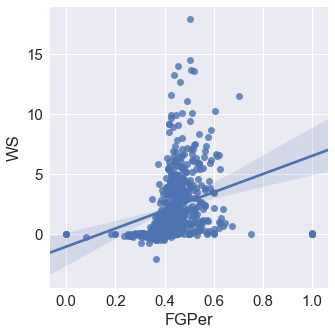

In [42]:
%matplotlib inline
sns.set(font_scale=1.5);
sns.lmplot(x='FGPer', y='WS', data=nba);

In [43]:
nba.fillna(value='0', inplace=True)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
feature_cols = ['FGPer']
X= nba[feature_cols]
y= nba.WS
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'WS')

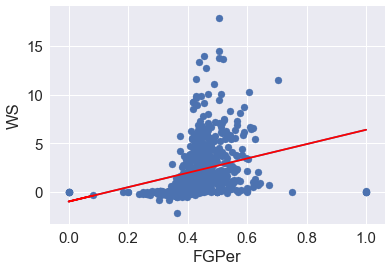

In [12]:
y_pred = linreg.predict(X)
y_pred.shape
nba['y_pred'] = y_pred
plt.plot(nba.FGPer, nba.y_pred)
plt.scatter(nba.FGPer, nba.WS)
plt.plot(nba.FGPer, nba.y_pred, color='red')
plt.xlabel('FGPer')
plt.ylabel('WS')

In [44]:
print(linreg.intercept_)
print(linreg.coef_)

-0.9625856583428951
[7.35790394]


In [70]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(nba, feature_cols):
    X = nba[feature_cols]
    y = nba.WS
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))
nba

,Season Start,Player Name,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FGPer
0,2016,Jimmer Fredette,26,NYK,2,0,5,47.4,109.40%,1,500.00%,0.0,0.0,0.0,0.0,0.0,0.0,23.8,38.0,0.1,0.0,0.1,0.514,19.5,-10.7,8.8,0.0,1,1,100.00%,1,1,1,0,0,0,150.00%,4,5,80.00%,0,0,0,0,0,0,1,1,7,1
1,2016,Briante Weber,23,MIA,1,0,3,39.3,100.00%,0,0.00%,0.0,36.6,18.9,72.3,0.0,0.0,0,15.2,0.0,0.0,0.0,0.634,15.3,-1.3,14.0,0.0,1,1,100.00%,0,0,0,1,1,100.00%,100.00%,0,0,0,0,1,1,1,0,0,0,1,2,1
2,2016,Thanasis Antetokounmpo,23,NYK,2,0,6,32.9,75.00%,0.25,0.00%,0.0,17.9,9.1,0.0,0.0,0.0,0,30.2,0.0,0.0,0.0,0.291,6.3,-10.5,-4.1,0.0,3,4,75.00%,0,1,0,3,3,100.00%,75.00%,0,0,0,0,1,1,0,0,0,0,2,6,0.75
3,2016,Rakeem Christmas,24,IND,1,0,6,32.0,100.00%,0,0.00%,18.3,0.0,9.1,0.0,0.0,0.0,0,14.7,0.0,0.0,0.0,0.343,9.7,-6.6,3.2,0.0,2,2,100.00%,0,0,0,2,2,100.00%,100.00%,0,0,0,1,0,1,0,0,0,0,1,4,1
4,2016,Stephen Curry,27,GSW,79,79,2700,31.5,66.90%,0.554,25.00%,2.9,13.6,8.6,33.7,3.0,0.4,12.9,32.6,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8,805,1598,50.40%,402,886,0.454,403,712,56.60%,63.00%,363,400,90.80%,68,362,430,527,169,15,262,161,2375,0.504
5,2016,Bryce Cotton,23,MEM,5,0,6,29.1,100.00%,0,0.00%,0.0,0.0,0.0,0.0,0.0,0.0,0,15.0,0.0,0.0,0.0,0.221,6.5,-6.1,0.4,0.0,2,2,100.00%,0,0,0,2,2,100.00%,100.00%,0,0,0,0,0,0,0,0,0,0,0,4,1
6,2016,Kevin Durant,27,OKC,72,72,2578,28.2,63.40%,0.348,36.10%,2.0,21.8,12.4,24.2,1.3,2.5,13.5,30.6,11.0,3.5,14.5,0.270,7.0,0.9,7.9,6.4,698,1381,50.50%,186,481,0.387,512,900,56.90%,57.30%,447,498,89.80%,45,544,589,361,69,85,250,137,2029,0.505
7,2016,Boban Marjanovic,27,SAS,54,4,508,27.7,66.20%,0,65.50%,16.9,26.2,21.7,6.6,1.2,3.5,11.5,22.8,2.3,1.2,3.4,0.325,2.7,0.9,3.6,0.7,105,174,60.30%,0,0,0,105,174,60.30%,60.30%,87,114,76.30%,73,121,194,21,12,23,29,54,297,0.603
8,2016,Russell Westbrook,27,OKC,80,80,2750,27.6,55.40%,0.236,39.70%,6.1,18.1,12.4,49.6,2.9,0.6,16.8,31.6,10.0,4.0,14.0,0.245,7.6,2.4,10.0,8.3,656,1444,45.40%,101,341,0.296,555,1103,50.30%,48.90%,465,573,81.20%,145,481,626,834,163,20,342,200,1878,0.454
9,2016,LeBron James,31,CLE,76,76,2709,27.5,58.80%,0.199,34.70%,4.7,18.8,11.8,36.0,2.0,1.5,13.2,31.4,9.6,4.0,13.6,0.242,6.9,2.3,9.1,7.6,737,1416,52.00%,87,282,0.309,650,1134,57.30%,55.10%,359,491,73.10%,111,454,565,514,104,49,249,143,1920,0.52


In [61]:
#Compute RMSEs of multiple features.
print(train_test_rmse(nba, ['FGPer', '3P', 'STL', 'TRB']))
print(train_test_rmse(nba, ['FGPer', 'STL', 'TRB']))
print(train_test_rmse(nba, ['FGPer', '3P','TRB']))

1.4749571097251295
1.5818821979653899
1.5002773391123883


In [62]:
# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)

# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())

In [48]:
np.sqrt(metrics.mean_squared_error(y_test, y_null))

2.919010142844816

In [63]:
# FGper + 3P + STL + TRB features combined have the lowest RMSE and therfore should be used versus the others
# Cross Check with 2017 statistics to pick which players 

nba2 = pd.read_csv('NBA2017.csv')
pd.set_option('display.max_columns',500) 
nba2.fillna(value='0', inplace=True)
nba2.rename(columns={'FG%':'FGPer'})
nba2['FGPer'] = (pd.to_numeric(nba2['FG%'].str[:-1])
                            .div(100)
                            .mask(nba['FG%'] == '%', 0))
nba2.fillna(value='0', inplace=True)



In [67]:
#Drop players with less than 20 games
nba2.drop(nba2[nba2.G < 20].index)
pd.set_option('display.max_rows', 100) 

#Sort players according to the feature cols selected
nba2.sort_values(by = ['FGPer', '3P', 'STL', 'TRB'], ascending=False)

,#,Season Start,Player Name,Player Salary in $,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FGPer
518,24216,2017,Stephen Curry,3.46826e+07,PG,28,GSW,79,79,2638,24.6,0.624,0.547,0.251,2.7,11.4,7.3,31.1,2.6,0.5,13,30.1,0,8.6,3.9,12.6,0.229,0,7.7,-0.4,7.3,6.2,675,1443,0.468,324,789,0.411,351,654,0.537,0.58,325,362,0.898,61,292,353,523,143,17,239,183,1999,0
331,24617,2017,Klay Thompson,1.78262e+07,SG,26,GSW,78,78,2649,17.4,0.592,0.47,0.158,2.2,9.2,5.9,9.3,1.2,1.2,8,26.1,0,4.2,2.9,7.1,0.128,0,2.4,-2.1,0.3,1.5,644,1376,0.468,268,647,0.414,376,729,0.516,0.565,186,218,0.853,49,236,285,160,66,40,128,139,1742,0
237,24306,2017,James Harden,2.82994e+07,PG,27,HOU,81,81,2947,27.3,0.613,0.493,0.575,3.5,20.9,12.2,50.7,2.0,1.0,19.5,34.2,0,11.5,3.6,15.0,0.245,0,8.7,1.5,10.1,9.0,674,1533,0.44,262,756,0.347,412,777,0.53,0.525,746,881,0.847,95,564,659,906,120,37,464,215,2356,0
184,24290,2017,Eric Gordon,1.2943e+07,SG,28,HOU,75,15,2323,13.1,0.557,0.651,0.172,1.4,8.1,4.7,12.3,1.0,1.4,10,22.1,0,2.5,1.4,3.8,0.079,0,1.0,-2.4,-1.4,0.4,412,1016,0.406,246,661,0.372,166,355,0.468,0.527,147,175,0.84,29,172,201,188,48,40,121,150,1217,0
221,24612,2017,Isaiah Thomas,6.2614e+06,PG,27,BOS,76,76,2569,26.5,0.625,0.439,0.441,1.9,7.0,4.4,32.6,1.4,0.4,10.7,34.0,0,10.9,1.6,12.6,0.235,0,8.8,-3.3,5.5,4.8,682,1473,0.463,245,646,0.379,437,827,0.528,0.546,590,649,0.909,43,162,205,449,70,13,210,167,2199,0
322,24645,2017,Kemba Walker,1.2e+07,PG,26,CHO,79,79,2739,21.3,0.569,0.415,0.248,1.8,10.6,6.2,29.1,1.6,0.7,9.5,29.2,0,5.9,2.2,8.1,0.142,0,5.3,-1.7,3.6,3.9,643,1449,0.444,240,602,0.399,403,847,0.476,0.527,304,359,0.847,45,263,308,435,85,22,168,119,1830,0
62,24137,2017,Bradley Beal,2.37755e+07,SG,23,WAS,77,77,2684,20.1,0.604,0.418,0.259,2.2,7.8,5.0,16.2,1.5,0.7,9.6,26.5,0,6.8,1.6,8.5,0.151,0,4.5,-2.4,2.2,2.8,637,1322,0.482,223,552,0.404,414,770,0.538,0.566,282,342,0.825,53,186,239,267,83,21,157,169,1779,0
116,24421,2017,Damian Lillard,2.61531e+07,PG,26,POR,75,75,2694,24.1,0.586,0.388,0.366,1.9,13.3,7.6,28.7,1.3,0.6,10.2,31.5,0,8.8,1.5,10.3,0.184,0,6.4,-2.0,4.3,4.3,661,1488,0.444,214,578,0.37,447,910,0.491,0.516,488,545,0.895,46,322,368,439,68,20,197,152,2024,0
493,24114,2017,Ryan Anderson,1.95785e+07,PF,28,HOU,72,72,2116,13.5,0.583,0.655,0.194,5.8,11.2,8.5,4.7,0.7,0.5,6.2,17.9,0,4.0,1.1,5.2,0.118,0,1.8,-2.6,-0.8,0.6,323,773,0.418,204,506,0.403,119,267,0.446,0.55,129,150,0.86,112,218,330,68,32,14,55,142,979,0
226,24551,2017,J.J. Redick,2.3e+07,SG,32,LAC,78,78,2198,14.8,0.599,0.526,0.227,0.6,7.9,4.3,7.8,1.3,0.5,9.1,21.9,0,3.3,1.5,4.8,0.105,0,2.0,-2.0,0.0,1.1,396,890,0.445,201,468,0.429,195,422,0.462,0.558,180,202,0.891,11,160,171,110,55,13,98,125,1173,0


In [ ]:
#Top Picks for a winning team based on the Feature Cols
#1. Point Guard : Stephen Curry
#2. Shooting Guard: Klay Thomson
#3. Small Forward: Paul George
#4. Power Forward: Ryan Anderson
#5. Center: Channing Frye

#Next 5 Players:
#1. Point Guard: James Harden
#2. Shooting Guard: Eric Gordon
#3. Small Forward: Trevor Ariza
#4. Power Forward: Kevin Love
#5. Center: Brook Lopez

#Subs Any 2 Players
#1. Isaiah Thiomas
#2. Kemba Walker
